### **Assignment-4**

## **ID:-202011050**


In [ ]:
import numpy as np
import nltk
fi = open("drive/MyDrive/IR file/YASS/stemming.txt",'r')
data = fi.read()
words=data.split()
len1=len(words)
print(len1)

23531


# Distance Function D1,D2,D3,D4 


In [ ]:
def D1(X,Y):
  n1=len(X)
  n2=len(Y)
  sz=max(n1,n2)
  i=0
  sum=0
  p=[1]*sz
  for x1,y1 in zip(X,Y):
    if x1==y1:
       p[i]=0
    i+=1
  sum=0;
  i=0;
  while i<sz:
    sum=sum+(1/2**i)*p[i]
    i+=1
  return sum

In [ ]:
def D2(X,Y):
  n1=len(X)
  n2=len(Y)
  i=0
  for x1,y1 in zip(X,Y):
    if x1!=y1:
      break 
    i+=1
  sz=max(n1,n2)
  sum=0;
  m=i
  if m==0:
    return 9999
  else:
    while i<sz:
      sum=sum+(1/2**(i-m))
      i+=1
    return sum/m

In [ ]:
def D3(X,Y):
  n1=len(X)
  n2=len(Y)
  i=0
  for x1,y1 in zip(X,Y):
    if x1!=y1:
      break 
    i+=1
  sz=max(n1,n2)
  sum=0;
  m=i
  if m==0:
    return 9999
  else:
    while i<sz:
      sum=sum+(1/2**(i-m))
      i+=1
    return sum/m*(sz-m)
      #here we start index with 0 so, +1 not added

In [ ]:
def D4(X,Y):
  n1=len(X)
  n2=len(Y)
  i=0
  for x1,y1 in zip(X,Y):
    if x1!=y1:
      break 
    i+=1
  sz=max(n1,n2)
  sum=0;
  m=i
  if m==0:
    return 9999
  else:
    while i<sz:
      sum=sum+(1/2**(i-m))
      i+=1
    return sum/sz*(sz-m)
   

# *Create Distance matrix*

In [ ]:
import numpy as np
D3_data=np.zeros((len1,len1))

In [ ]:
import nltk
for i in range(len1):
  for j in range(i,len1,1):
    #D3_data[i,j]=D1(words[i],words[j])
    D3_data[i,j]=nltk.edit_distance(words[i], words[j])
    D3_data[j,i]=D3_data[i,j]


In [ ]:
print(D3_data[0,5])

0.9375


In [ ]:
import pickle
with open('drive/MyDrive/IR file/YASS/Levenshtein_DATA.txt', 'wb') as fh:
   pickle.dump(D3_data, fh,protocol=4)

# load file 

Create D1_data,D2_data,D3_data,D4_data => this file store distance matrix 

In [ ]:
import pickle
pickle_off = open ("drive/MyDrive/IR file/YASS/D4_DATA.txt", "rb")
d4_val = pickle.load(pickle_off)
print(d4_val[0,5])

1.5


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [ ]:
obj=AgglomerativeClustering(n_clusters=None,affinity='precomputed',linkage='single',distance_threshold=0.25)
model=obj.fit(d4_val)
lables=model.labels_

In [ ]:
print(len(lables))

23531


In [ ]:
print(model.n_clusters_)

17632


In [ ]:
word_cluster=[]     
for i in range(len(lables)):
  word_cluster.append((i,lables[i]))   #save zip(index,cluster_id) and sort by cluster_id 
word_cluster.sort(key = lambda x: x[1])

In [ ]:
len(word_cluster)

23531

In [ ]:
#making list of list of cluster
temp_cluster=[]
fin_cluster=[]
i=0
j=0
while(i<len(word_cluster)):
  if(word_cluster[i][1]==j):
    temp_cluster.append(word_cluster[i][0])           
    #print(i)
    i+=1
  else:
    j+=1
    fin_cluster.append(temp_cluster)
    temp_cluster=[]

In [ ]:
len(fin_cluster)

12763

In [ ]:
len(word_cluster)

23531

In [ ]:
words[10090]

'honest'

In [ ]:
#finding root word
root=[]
for i in range(len(fin_cluster)):
  str_list=[]
  for j in range(len(fin_cluster[i])):          
    str_list.append(words[fin_cluster[i][j]])
  temp=min(str_list,key=len)
  root.append(temp)

In [ ]:
#mapping of word to root word
fin_ans={}
for values in range(len(root)):
  for key in (fin_cluster[values]):
    fin_ans[words[key]]=root[values]

In [ ]:
import pickle
with open('drive/MyDrive/IR file/YASS/D4_dict.txt', 'wb') as fh:
   pickle.dump(fin_ans, fh,protocol=4)

In [ ]:
fin_ans['am']

'am'

In [ ]:
Th=np.linspace(0,0.5,30)
val=[]       #store no of cluster for perticular Thresold value
for ele in Th:
  obj=AgglomerativeClustering(n_clusters=None,affinity='precomputed',linkage='single',distance_threshold=ele)
  clusters=obj.fit(D3_data)
  print(clusters.n_clusters_)
  val.append(clusters.n_clusters_)


23531
18393
15313
14117
10954
10547
9010
7438
5297
5092
4468
3405
3262
2658
2356
1029
998
913
831
744
639
581
442
435
409
384
344
329


In [ ]:
Th=np.linspace(0,0.45,40)
print(Th)

[0.         0.01153846 0.02307692 0.03461538 0.04615385 0.05769231
 0.06923077 0.08076923 0.09230769 0.10384615 0.11538462 0.12692308
 0.13846154 0.15       0.16153846 0.17307692 0.18461538 0.19615385
 0.20769231 0.21923077 0.23076923 0.24230769 0.25384615 0.26538462
 0.27692308 0.28846154 0.3        0.31153846 0.32307692 0.33461538
 0.34615385 0.35769231 0.36923077 0.38076923 0.39230769 0.40384615
 0.41538462 0.42692308 0.43846154 0.45      ]


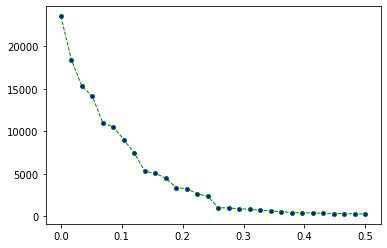

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(Th, val, color='green', linestyle='dashed', linewidth = 1,
         marker='o', markerfacecolor='blue', markersize=4) 

In [ ]:
import pickle
with open('drive/MyDrive/IR file/YASS/D4_y.txt', 'wb') as fh:
   pickle.dump(val, fh,protocol=4)   